In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

In [3]:
# Summary statistics
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We already can see 38% of people survived the Titanic

In [4]:
# Data Cleaning and Feature Engineering 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We now know that the data set has 891 people (rows) and 11 features plus our prediction target (Survived)

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Let us find how much is missing 
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# Another clever method 
full_df = data.isnull().sum()
percent_per = data.isnull().sum()/data.isnull().count()*100
missing = pd.concat([full_df, percent_per], axis = 1, keys = ['Total', '%'])
missing

,Total,%
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,19.865320
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000


In [8]:
# Begin analysis for categorical and numerical data 
df_num = data[['Age','SibSp','Parch','Fare']]

df_cat = data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

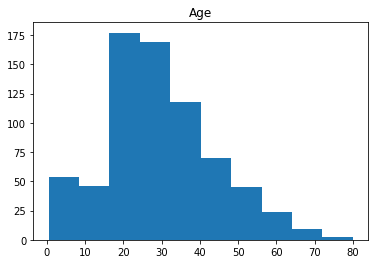

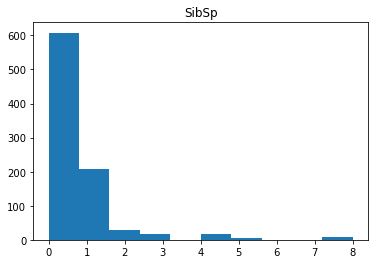

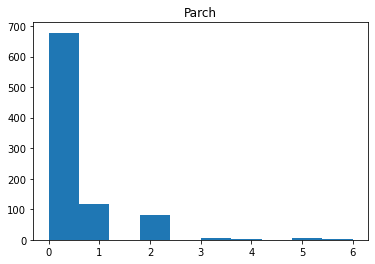

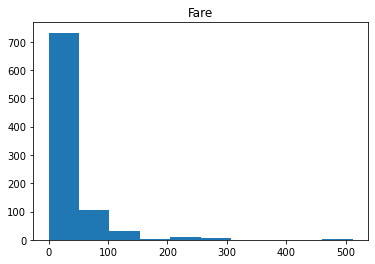

In [9]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

/Users/johncomo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


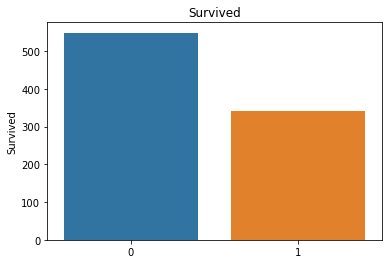

/Users/johncomo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


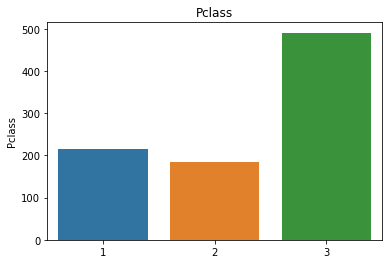

/Users/johncomo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


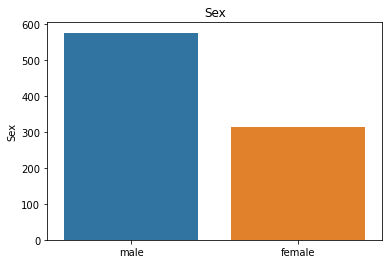

/Users/johncomo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


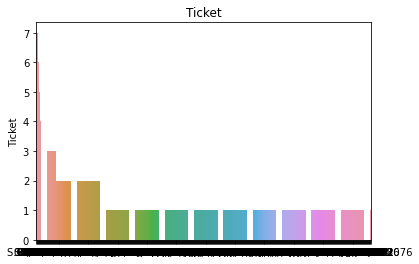

/Users/johncomo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


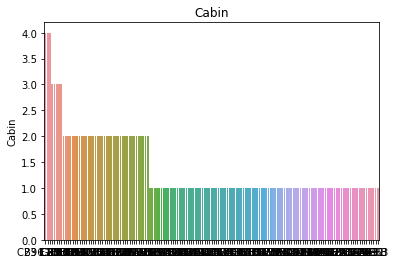

/Users/johncomo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


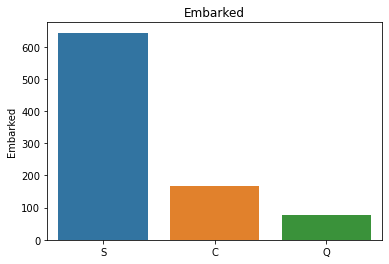

In [12]:
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index,df_cat[i].value_counts()).set_title(i)
    plt.show()


ABOVE IS GRAPHICAL ANALYSIS, BELOW NUMERICAL ANALYSIS VIA PANDAS MANIPULATION IS DONE

In [13]:
# Numerical
pd.pivot_table(data, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


What we can take away: 
1) Average age of survivors is 28, perhaps younger people have a better chance of living but average age of those not survived is 30 so it requires further investigation.

2) People whose fares were higher had a higher chance of survival. This may be due to cheaper fares were people located on bottom of the ship and were first to be in crash / underwater. 

3) If you have a parent you have a higher chance of survival perhaps parents would save children before themselves. 

In [15]:
# Categorical 
print(pd.pivot_table(data, index = 'Survived', columns = 'Pclass',
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Survived', columns = 'Sex', 
                     values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Survived', columns = 'Embarked', 
                     values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


What we can take away: 

1) People in Pclass 1 have a higher chance of survival. They have more people who survived than Pclass 3 which has more than double the amount of people, adding validity to our guess of the rich surving. 

2)Overwhelming amount of women survived and an overwhelming amount of males died. 

3) Rather meaningless. 

In [16]:
# BEGIN THE DATA CLEANING PROCESS

In [17]:
# boolean for cabin
#x = data.Cabin.unique()[0]

data['Cabin'] = data['Cabin'].fillna(0)

for row in range(len(data)): 
    if data['Cabin'][row] != 0: 
        data.at[row, 'Cabin'] = 1
    #else: 
     #   data.at[row, 'Cabin'] = 0
        
data['Cabin'].value_counts()

0    687
1    204
Name: Cabin, dtype: int64

In [18]:
#boolean for Sex and Embarkment 
data = pd.get_dummies(data, columns = ['Sex', 'Embarked'])
data['Age'] = data['Age'].fillna(100)
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,0,0,1


In [19]:
# Alternate Methods
#boolean for embarked
#embarked_dummies = pd.get_dummies(data.Embarked, prefix = 'Embarked')
#data = pd.concat([data,embarked_dummies], axis = 1)

# boolean for male 
#male_dummies = pd.get_dummies(data.Sex, prefix = 'Sex')
#data = pd.concat([data,male_dummies], axis = 1)

In [20]:
data.Ticket.describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [21]:
# We are going to drop Ticket because I cannot see how to attain meaningful informaton from 700 unique values out of 
# 891. We are also going to drop Sex_female because sex is binary Sex_female and Sex_male tells us the same info. 
data.drop(['Ticket', 'Sex_female'], axis = 1, inplace = True)
data.drop(['PassengerId'], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,0,1,0,0,1


In [22]:
# We now need to begin to normalize some of our integer data, namely fare and age
pd.qcut(data.Fare,6) #6 is an arbitary number but I chose it because I am thinking of number of possible classes

0        (-0.001, 7.775]
1      (52.369, 512.329]
2         (7.775, 8.662]
3      (52.369, 512.329]
4         (7.775, 8.662]
             ...        
886      (8.662, 14.454]
887       (26.0, 52.369]
888       (14.454, 26.0]
889       (26.0, 52.369]
890      (-0.001, 7.775]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64]): [(-0.001, 7.775] < (7.775, 8.662] < (8.662, 14.454] < (14.454, 26.0] < (26.0, 52.369] < (52.369, 512.329]]

In [23]:
df = [data]

for dataset in df: 
    dataset.loc[ dataset['Fare'] <= 7.775, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.775) & (dataset['Fare'] <= 8.662), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8.662) & (dataset['Fare'] <= 14.454), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 26), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52.369), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 52.369, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [24]:
# I applied the quartile technique above for a distinction of class perhaps
# For age I will simply divide them into what I feel are proper ages that can cause a difference in survival 
df = [data]

for dataset in df:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 7
    

In [25]:
data.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,"Braund, Mr. Owen Harris",2,1,0,0,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",5,1,0,5,1,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",3,0,0,1,0,0,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",5,1,0,5,1,0,0,0,1
4,0,3,"Allen, Mr. William Henry",5,0,0,1,0,1,0,0,1


In [27]:
names = data.Name

for row in range(len(names)): 
    broken = data.Name[row].split(" ")
    title = broken[1]
    #print(title)
    
# I would come back to this and put numbers to titles 
# Perhaps this will add to hypothesis of rich survivng by studying titles

In [28]:
# For now
data.drop(['Name'], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,2,1,0,0,0,1,0,0,1
1,1,1,5,1,0,5,1,0,1,0,0
2,1,3,3,0,0,1,0,0,0,0,1
3,1,1,5,1,0,5,1,0,0,0,1
4,0,3,5,0,0,1,0,1,0,0,1


In [29]:
# Prepare for machine learning 
from sklearn.model_selection import train_test_split

X = data.drop("Survived", axis = 1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

clf = SGDClassifier(max_iter=5, tol=None, loss = 'hinge')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test,y_pred))

Accuracy 0.7757847533632287


In [31]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test,y_pred))

Accuracy 0.8161434977578476


In [39]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 2)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

print("Accuracy", metrics.accuracy_score(y_test,y_pred))

Accuracy 0.7713004484304933


In [37]:
# Improvements using Cross Fold Validation
from sklearn.model_selection import cross_val_score

logreg_cv = LogisticRegression()
cv = cross_val_score(logreg_cv, X_train, y_train, cv = 20)
print(cv)
print(cv.mean())

[0.88235294 0.85294118 0.64705882 0.70588235 0.70588235 0.94117647
 0.91176471 0.79411765 0.84848485 0.81818182 0.78787879 0.6969697
 0.6969697  0.72727273 0.84848485 0.72727273 0.72727273 0.75757576
 0.93939394 0.87878788]
0.7947860962566845


In [38]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, X_train, y_train, cv = 20)
print(cv)
print(cv.mean())

[0.76470588 0.70588235 0.61764706 0.76470588 0.70588235 0.88235294
 0.76470588 0.85294118 0.81818182 0.78787879 0.72727273 0.72727273
 0.75757576 0.6969697  0.78787879 0.66666667 0.6969697  0.81818182
 0.84848485 0.87878788]
0.7635472370766488


We can see some iterations have much higher socres, while some have much lower, a high variance between iterations. This can be a product of perhaps a slight overfitting of our model. 

As one can see above, I chose to implement Logistic Regression,
Stochastic Gradient Descent and K-Means Clustering Algorithms to 
evaluate the probablity of survival of Titanic passangers. I used 
logistic regresion because it is a prime option to estimate the 
probabilities of events (survival). I implemented a stochastic 
gradient descent algorithm because of my familiarity with it as 
well as the computational power it posses compared to gradient 
descent. Finally I used KMeans Clustering because of its grouping
ability to group people into 2 classes survivors and those who did
not. The logistic regression model proved the most accurate at nearly
82% which is expected as a result of the specific use case. We are 
attempting to estimate the probability of survival and that is the 
exact function of logistic regression. I determined accuracy by 
computing the accuracy via built in methods. I felt accuracy was the
best metric for comparison as opposed to precision or recall because
we are overall concerened with the "corectness" of our predictions. 
Methods to improve accuracy primarily would be to tune parameters on 
each of models. K-Cross fold validation proved to have slightly worse 
results due to the high variance. I tested my model by comparing the
predictions of the model against the actual results (test vs train). 


The essence of this task was driven to find out who survives the 
Titanic crash. We have found the strongest determining factor to 
predict survival is the class the person belonged to. This was 
dictated by the fare cost combined with the Pclass. Age can also 
be a strong factor but there is very specific classes where survival 
is deeemed. For example, young people have a high probability of survival, 
but ages 0-1 have nearly double the rate of survival compared to 2-4 year
olds. Another strong category is if a person had parents and if 
they had siblings. If they only had parents aboard their survival 
rate would be much higher as a result presumably of parents 
protecting kids. However, if one had a sibling, the chance of survival 
was much lower, perhaps because parents had to choose a child. 
Lastly, gender was an extremely powerful predictor as womens survival 
rates were over 50% higher than mens. A safe summary of our findings 
and the dataset can go as women and children were protected and those
of a higher class were more likely to survive. 
